# Convert timeseries of some SNOTEL stations to parquet
 
 
 requires ulmo:
 mamba create -n ulmo ulmo shapely geopandas pyarrow folium ipykernel 
 
 https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html
 
 https://uwgda-jupyterbook.readthedocs.io/en/latest/modules/08_Vector_TimeSeries_SNOTEL/08_Vector_TimeSeries_SNOTEL_prep.html

In [2]:
import ulmo
import pandas as pd
import geopandas as gpd
from datetime import datetime
import numpy as np

In [3]:
%config InlineBackend.figure_format='retina'

In [4]:
#This is the latest CUAHSI API endpoint
wsdlurl = 'https://hydroportal.cuahsi.org/Snotel/cuahsi_1_1.asmx?WSDL'

In [5]:
%%time
sites = ulmo.cuahsi.wof.get_sites(wsdlurl)

CPU times: user 273 ms, sys: 22.7 ms, total: 296 ms
Wall time: 2.89 s


In [6]:
df = pd.DataFrame.from_dict(sites, orient='index').dropna()
df

,code,name,network,location,elevation_m,site_property
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,"{'latitude': '41.2358283996582', 'longitude': ...",1886.7120361328125,"{'county': 'Modoc', 'state': 'California', 'si..."
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,"{'latitude': '37.522171020507813', 'longitude'...",2712.719970703125,"{'county': 'Kane', 'state': 'Utah', 'site_comm..."
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,"{'latitude': '45.59722900390625', 'longitude':...",2529.840087890625,"{'county': 'Madison', 'state': 'Montana', 'sit..."
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,"{'latitude': '61.749668121337891', 'longitude'...",48.768001556396484,"{'county': 'Matanuska-Susitna', 'state': 'Alas..."
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,"{'latitude': '47.779571533203125', 'longitude'...",1066.800048828125,"{'county': 'King', 'state': 'Washington', 'sit..."
...,...,...,...,...,...,...
SNOTEL:877_AZ_SNTL,877_AZ_SNTL,Workman Creek,SNOTEL,"{'latitude': '33.812419891357422', 'longitude'...",2103.1201171875,"{'county': 'Gila', 'state': 'Arizona', 'site_c..."
SNOTEL:1228_UT_SNTL,1228_UT_SNTL,Wrigley Creek,SNOTEL,"{'latitude': '39.132331848144531', 'longitude'...",2842.86962890625,"{'county': 'Sanpete', 'state': 'Utah', 'site_c..."
SNOTEL:1197_UT_SNTL,1197_UT_SNTL,Yankee Reservoir,SNOTEL,"{'latitude': '37.747970581054688', 'longitude'...",2649.321533203125,"{'county': 'Iron', 'state': 'Utah', 'site_comm..."
SNOTEL:878_WY_SNTL,878_WY_SNTL,Younts Peak,SNOTEL,"{'latitude': '43.9322509765625', 'longitude': ...",2545.080078125,"{'county': 'Park', 'state': 'Wyoming', 'site_c..."


In [7]:
# These are all SNOTEL, so simplify by just using code as index
df = df.drop(columns='network').set_index('code')
df.head()

,name,location,elevation_m,site_property
code,,,,
301_CA_SNTL,Adin Mtn,"{'latitude': '41.2358283996582', 'longitude': ...",1886.7120361328125,"{'county': 'Modoc', 'state': 'California', 'si..."
907_UT_SNTL,Agua Canyon,"{'latitude': '37.522171020507813', 'longitude'...",2712.719970703125,"{'county': 'Kane', 'state': 'Utah', 'site_comm..."
916_MT_SNTL,Albro Lake,"{'latitude': '45.59722900390625', 'longitude':...",2529.840087890625,"{'county': 'Madison', 'state': 'Montana', 'sit..."
1267_AK_SNTL,Alexander Lake,"{'latitude': '61.749668121337891', 'longitude'...",48.768001556396484,"{'county': 'Matanuska-Susitna', 'state': 'Alas..."
908_WA_SNTL,Alpine Meadows,"{'latitude': '47.779571533203125', 'longitude'...",1066.800048828125,"{'county': 'King', 'state': 'Washington', 'sit..."


In [8]:
# explode dictionaries to separate columns, but with same index
tmp = pd.json_normalize(df.location).set_index(df.index)
tmp.head()

,latitude,longitude
code,,
301_CA_SNTL,41.2358283996582,-120.79192352294922
907_UT_SNTL,37.522171020507813,-112.27117919921875
916_MT_SNTL,45.59722900390625,-111.95902252197266
1267_AK_SNTL,61.749668121337891,-150.88966369628906
908_WA_SNTL,47.779571533203125,-121.69847106933594


In [9]:
# Since the index is the same, we can do an outer join!
df = df.join(tmp)
df.head()

,name,location,elevation_m,site_property,latitude,longitude
code,,,,,,
301_CA_SNTL,Adin Mtn,"{'latitude': '41.2358283996582', 'longitude': ...",1886.7120361328125,"{'county': 'Modoc', 'state': 'California', 'si...",41.2358283996582,-120.79192352294922
907_UT_SNTL,Agua Canyon,"{'latitude': '37.522171020507813', 'longitude'...",2712.719970703125,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",37.522171020507813,-112.27117919921875
916_MT_SNTL,Albro Lake,"{'latitude': '45.59722900390625', 'longitude':...",2529.840087890625,"{'county': 'Madison', 'state': 'Montana', 'sit...",45.59722900390625,-111.95902252197266
1267_AK_SNTL,Alexander Lake,"{'latitude': '61.749668121337891', 'longitude'...",48.768001556396484,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",61.749668121337891,-150.88966369628906
908_WA_SNTL,Alpine Meadows,"{'latitude': '47.779571533203125', 'longitude'...",1066.800048828125,"{'county': 'King', 'state': 'Washington', 'sit...",47.779571533203125,-121.69847106933594


In [10]:
tmp = pd.json_normalize(df.site_property).set_index(df.index)
tmp.head()

,county,state,site_comments,pos_accuracy_m
code,,,,
301_CA_SNTL,Modoc,California,beginDate=10/1/1983 12:00:00 AM|endDate=1/1/21...,0
907_UT_SNTL,Kane,Utah,beginDate=10/1/1994 12:00:00 AM|endDate=1/1/21...,0
916_MT_SNTL,Madison,Montana,beginDate=9/1/1996 12:00:00 AM|endDate=1/1/210...,0
1267_AK_SNTL,Matanuska-Susitna,Alaska,beginDate=8/28/2014 12:00:00 AM|endDate=1/1/21...,0
908_WA_SNTL,King,Washington,beginDate=9/1/1994 12:00:00 AM|endDate=1/1/210...,0


In [11]:
# Append county and state fields for convenience
df = df.join(tmp[['county','state']])

In [12]:
# Want to parse site_comments into separate columns to!
tmp.iloc[0].site_comments

'beginDate=10/1/1983 12:00:00 AM|endDate=1/1/2100 12:00:00 AM|HUC=180200021403|HUD=18020002|TimeZone=-8.0|actonId=20H13S|shefId=ADMC1|stationTriplet=301:CA:SNTL|isActive=True'

In [13]:
# Turn it into a dictionary and use the same approach as above!
def comments2dict(comment):    
    comments = comment.split('|')
    keys = [x.split('=')[0] for x in comments]
    vals = [x.split('=')[1] for x in comments] 
    dictionary = dict(zip(keys,vals))
    return dictionary

mapping = tmp.site_comments.apply(comments2dict)
df3 = pd.json_normalize(mapping).set_index(df.index)
df3.head()

,beginDate,endDate,HUC,HUD,TimeZone,actonId,shefId,stationTriplet,isActive
code,,,,,,,,,
301_CA_SNTL,10/1/1983 12:00:00 AM,1/1/2100 12:00:00 AM,180200021403,18020002,-8.0,20H13S,ADMC1,301:CA:SNTL,True
907_UT_SNTL,10/1/1994 12:00:00 AM,1/1/2100 12:00:00 AM,160300020301,16030002,-8.0,12M26S,AGUU1,907:UT:SNTL,True
916_MT_SNTL,9/1/1996 12:00:00 AM,1/1/2100 12:00:00 AM,100200050701,10020005,-8.0,11D28S,ABRM8,916:MT:SNTL,True
1267_AK_SNTL,8/28/2014 12:00:00 AM,1/1/2100 12:00:00 AM,190205051106,,-9.0,50M01S,ALXA2,1267:AK:SNTL,True
908_WA_SNTL,9/1/1994 12:00:00 AM,1/1/2100 12:00:00 AM,171100100501,17110010,-8.0,21B48S,APSW1,908:WA:SNTL,True


In [14]:
# Don't need all these columns, just select a few and change dtype:
df = df.join(df3.loc[:,['beginDate','endDate','isActive']])
df.head()

,name,location,elevation_m,site_property,latitude,longitude,county,state,beginDate,endDate,isActive
code,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,"{'latitude': '41.2358283996582', 'longitude': ...",1886.7120361328125,"{'county': 'Modoc', 'state': 'California', 'si...",41.2358283996582,-120.79192352294922,Modoc,California,10/1/1983 12:00:00 AM,1/1/2100 12:00:00 AM,True
907_UT_SNTL,Agua Canyon,"{'latitude': '37.522171020507813', 'longitude'...",2712.719970703125,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",37.522171020507813,-112.27117919921875,Kane,Utah,10/1/1994 12:00:00 AM,1/1/2100 12:00:00 AM,True
916_MT_SNTL,Albro Lake,"{'latitude': '45.59722900390625', 'longitude':...",2529.840087890625,"{'county': 'Madison', 'state': 'Montana', 'sit...",45.59722900390625,-111.95902252197266,Madison,Montana,9/1/1996 12:00:00 AM,1/1/2100 12:00:00 AM,True
1267_AK_SNTL,Alexander Lake,"{'latitude': '61.749668121337891', 'longitude'...",48.768001556396484,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",61.749668121337891,-150.88966369628906,Matanuska-Susitna,Alaska,8/28/2014 12:00:00 AM,1/1/2100 12:00:00 AM,True
908_WA_SNTL,Alpine Meadows,"{'latitude': '47.779571533203125', 'longitude'...",1066.800048828125,"{'county': 'King', 'state': 'Washington', 'sit...",47.779571533203125,-121.69847106933594,King,Washington,9/1/1994 12:00:00 AM,1/1/2100 12:00:00 AM,True


In [15]:
# Finally drop some no longer necessary columns
df = df.drop(columns=['location','site_property'])

In [16]:
# NOTE: dtypes are all strings, so as a last step change those
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 301_CA_SNTL to 1033_CO_SNTL
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         930 non-null    object
 1   elevation_m  930 non-null    object
 2   latitude     930 non-null    object
 3   longitude    930 non-null    object
 4   county       930 non-null    object
 5   state        930 non-null    object
 6   beginDate    930 non-null    object
 7   endDate      930 non-null    object
 8   isActive     930 non-null    object
dtypes: object(9)
memory usage: 104.9+ KB


In [17]:
#Note everything was parsed as strings, so change to appropriated dytes
df['endDate'] = pd.to_datetime(df.endDate)
df['beginDate'] = pd.to_datetime(df.beginDate)
df = df.astype(dict(elevation_m=float, 
                    latitude=float,
                    longitude=float,
                    # isActive=bool, # Gotcha bool('False') = True ?!
                   ))
df['isActive'] = df.isActive.replace({'True':True, 'False':False})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 301_CA_SNTL to 1033_CO_SNTL
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         930 non-null    object        
 1   elevation_m  930 non-null    float64       
 2   latitude     930 non-null    float64       
 3   longitude    930 non-null    float64       
 4   county       930 non-null    object        
 5   state        930 non-null    object        
 6   beginDate    930 non-null    datetime64[ns]
 7   endDate      930 non-null    datetime64[ns]
 8   isActive     930 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(3), object(3)
memory usage: 98.6+ KB


In [18]:
df.head()

,name,elevation_m,latitude,longitude,county,state,beginDate,endDate,isActive
code,,,,,,,,,
301_CA_SNTL,Adin Mtn,1886.712036,41.235828,-120.791924,Modoc,California,1983-10-01,2100-01-01,True
907_UT_SNTL,Agua Canyon,2712.719971,37.522171,-112.271179,Kane,Utah,1994-10-01,2100-01-01,True
916_MT_SNTL,Albro Lake,2529.840088,45.597229,-111.959023,Madison,Montana,1996-09-01,2100-01-01,True
1267_AK_SNTL,Alexander Lake,48.768002,61.749668,-150.889664,Matanuska-Susitna,Alaska,2014-08-28,2100-01-01,True
908_WA_SNTL,Alpine Meadows,1066.800049,47.779572,-121.698471,King,Washington,1994-09-01,2100-01-01,True


In [19]:
df.to_parquet('snotel-sites.parquet')

In [20]:
df = pd.read_parquet('snotel-sites.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 301_CA_SNTL to 1033_CO_SNTL
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         930 non-null    object        
 1   elevation_m  930 non-null    float64       
 2   latitude     930 non-null    float64       
 3   longitude    930 non-null    float64       
 4   county       930 non-null    object        
 5   state        930 non-null    object        
 6   beginDate    930 non-null    datetime64[ns]
 7   endDate      930 non-null    datetime64[ns]
 8   isActive     930 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(3), object(3)
memory usage: 66.3+ KB


## Site analysis

In [21]:
# How many operational sites
df.groupby('isActive').name.count()

isActive
False     62
True     868
Name: name, dtype: int64

In [22]:
# Counts of stations by date 
df.groupby('state').name.count()

state
Alaska           65
Arizona          25
California       35
Colorado        121
Idaho            85
Montana          99
Nevada           56
New Mexico       29
Oregon           96
South Dakota      3
Utah            134
Washington       84
Wyoming          98
Name: name, dtype: int64

In [23]:
#?! what's up with 1930s and 2079s?!
df.groupby(df.beginDate.dt.year).isActive.count()

beginDate
1937     1
1938     1
1949     2
1953     2
1956     1
        ..
2014    11
2015     5
2016     6
2017     4
2079     1
Name: isActive, Length: 63, dtype: int64

In [24]:
#?! what's up with 1930s and 2079s?!
df.groupby(df.endDate.dt.year).isActive.count()

endDate
1986      1
1987      1
1988      4
1989      6
1990      3
1991      2
1992      4
1993      1
1994      1
1996      2
1997      5
1998      1
1999      3
2000      1
2001      1
2003      3
2005      1
2006      5
2007      3
2008      8
2010      1
2013      2
2015      1
2017      2
2100    868
Name: isActive, dtype: int64

In [25]:
df[df.beginDate.dt.year == 2079]

,name,elevation_m,latitude,longitude,county,state,beginDate,endDate,isActive
code,,,,,,,,,
1157_WA_SNTL,Stickney Ridge,1161.287964,47.923401,-121.616699,Snohomish,Washington,2079-06-06,2100-01-01,True


In [26]:
# Can investigate here! seems this station does not exist anymore, and no historical data. usdafpacbc@servicenowservices.com ?
#https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=1157

In [27]:
df[df.beginDate.dt.year == 1937] 
#https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=670 #Yellowstone national park :) 

,name,elevation_m,latitude,longitude,county,state,beginDate,endDate,isActive
code,,,,,,,,,
670_MT_SNTL,Northeast Entrance,2240.280029,45.00565,-110.014061,Yellowstone National Park,Montana,1937-10-01,2100-01-01,True


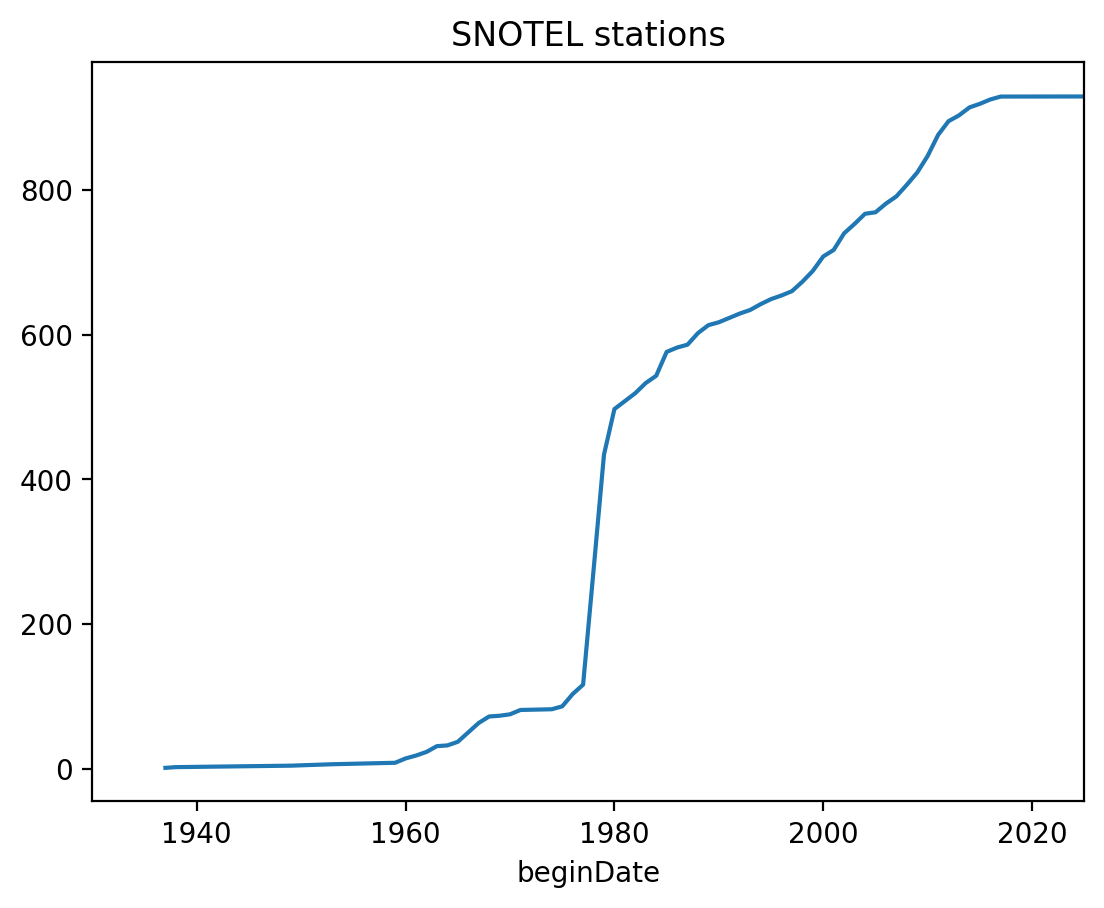

In [28]:
# Plot of snotel stations over time
df.groupby(df.beginDate.dt.year).isActive.count().cumsum().plot(title='SNOTEL stations', xlim=(1930,2025));

In [29]:
# Other ideas: look at average duration of station recordings

## Geodataframe

In [30]:
# Let's plot these stations on a map
geometry = gpd.points_from_xy(df.longitude, df.latitude, crs='EPSG:4326')
gf = gpd.GeoDataFrame(df, geometry=geometry)

# This method does not like timestamps so conver to strings first
gf.astype(dict(beginDate=str, endDate=str)).explore()

In [31]:
# Save this to geoparquet for later
gf.to_parquet('snotel-sites.geoparquet')

In [32]:
# Also save geojson
gf.to_file('snotel-sites.geojson')